<b><u>Takeaways:-</u></b>
<br/>3rd and 4th moments (Skewness and Kurtosis)

Sometimes mean and variance are not enough to describe a distribution. When we calculate variance, we square the deviations around the mean. In the case of large deviations, we do not know whether they are likely to be positive or negative. This is where the skewness and symmetry of a distribution come in. A distribution is <i>symmetric</i> if the parts on either side of the mean are mirror images of each other. For example, the normal distribution is symmetric. The normal distribution with mean $\mu$ and standard deviation $\sigma$ is defined as
$$ f(x) = \frac{1}{\sigma \sqrt{2 \pi}} e^{-\frac{(x - \mu)^2}{2 \sigma^2}} $$
We can plot it to confirm that it is symmetric:

In [2]:
library(quantmod)
library('fBasics')

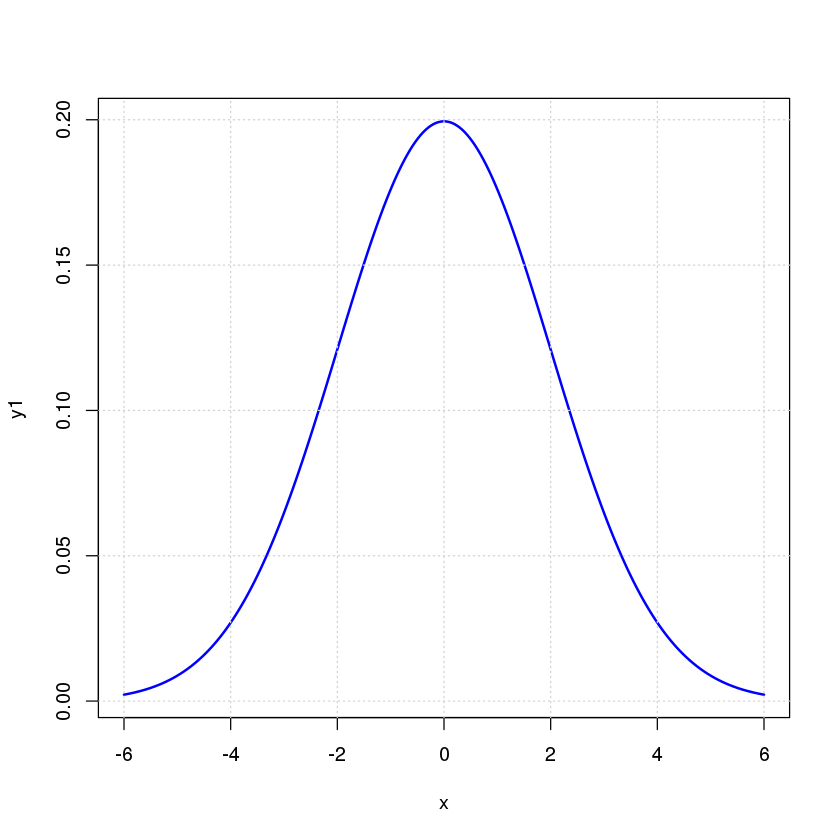

In [18]:
x=seq(-6, 6, .01)
# Create normal density with mean 0 and standard deviataion 2
y1=dnorm(x, mean = 0, sd=2)
plot(x,y1, type='l', col = 'blue', lwd = 2)
grid()

A distribution which is not symmetric is called <i>skewed</i>. For instance, a distribution can have many small positive and a few large negative values (negatively skewed) or vice versa (positively skewed), and still have a mean of 0. A symmetric distribution has skewness 0. Positively skewed unimodal (one mode) distributions have the property that mean > median > mode. Negatively skewed unimodal distributions are the reverse, with mean < median < mode. All three are equal for a symmetric unimodal distribution.

The explicit formula for skewness is:
$$ S_K = \frac{n}{(n-1)(n-2)} \frac{\sum_{i=1}^n (X_i - \mu)^3}{\sigma^3} $$

Where $n$ is the number of observations, $\mu$ is the arithmetic mean, and $\sigma$ is the standard deviation. The sign of this quantity describes the direction of the skew as described above. We can plot a positively skewed and a negatively skewed distribution to see what they look like. For unimodal distributions, a negative skew typically indicates that the tail is fatter on the left, while a positive skew indicates that the tail is fatter on the right.

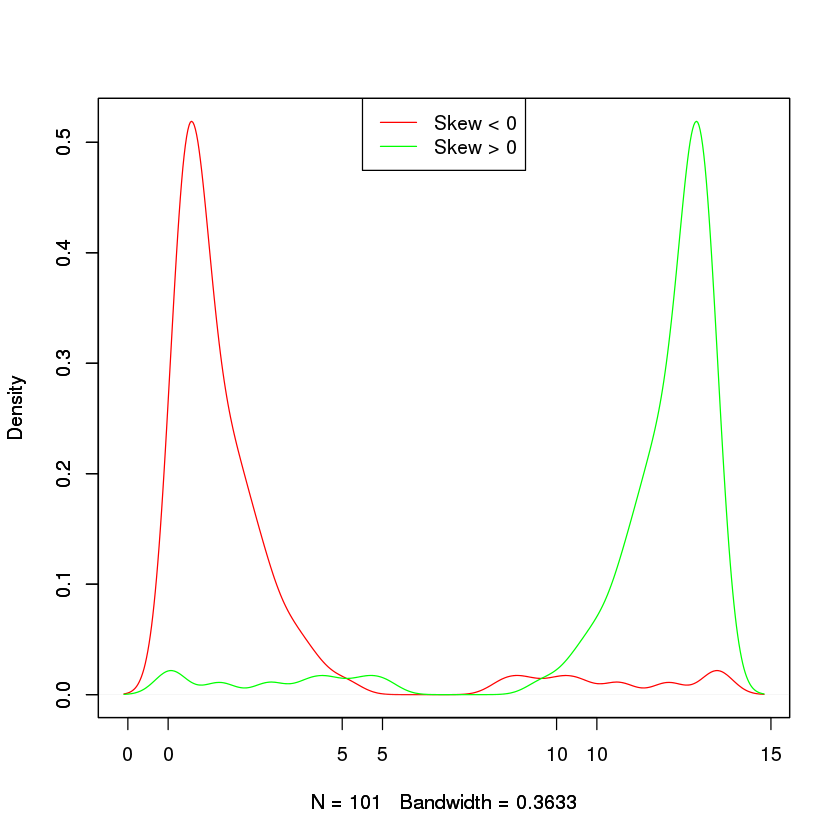

In [35]:
# Generate x-values for which we will plot the distribution
x=seq(0, 10, .1)
# Negatively skewed distribution
y1=rlnorm(x, mean=0, sd=1)
plot( density(y1), type="l", col="red", main = "")
par(new=TRUE)
# Positively skewed distribution
y2=abs((max(y1)+1)-y1)
plot( density(y2), type="l", col="green", main = "")
legend("top", c('Skew < 0','Skew > 0'),lty=c(1,1), col=c('red','green'))

Although skew is less obvious when graphing discrete data sets, we can still compute it. For example, below are the skew, mean, and median for S&P 500 returns 2012-2014. Note that the skew is negative, and so the mean is less than the median.

[1] "SPY"

           SPY.Open SPY.High SPY.Low SPY.Close SPY.Volume SPY.Adjusted
2012-01-03   127.76   128.38  127.43    127.50  193697900     116.8944
2012-01-04   127.20   127.81  126.71    127.70  127186500     117.0777
2012-01-05   127.01   128.23  126.43    128.04  173895000     117.3894
2012-01-06   128.20   128.22  127.29    127.71  148050000     117.0869
2012-01-09   128.00   128.18  127.41    128.02   99530200     117.3711
2012-01-10   129.39   129.65  128.95    129.13  115282000     118.3888

,SPY.Adjusted
nobs,754
NAs,1
Minimum,-3.833845
Maximum,4.837331
1. Quartile,-0.469622
3. Quartile,0.845062
Mean,0.110832
Median,0.114738
Sum,83.45664
SE Mean,0.041479


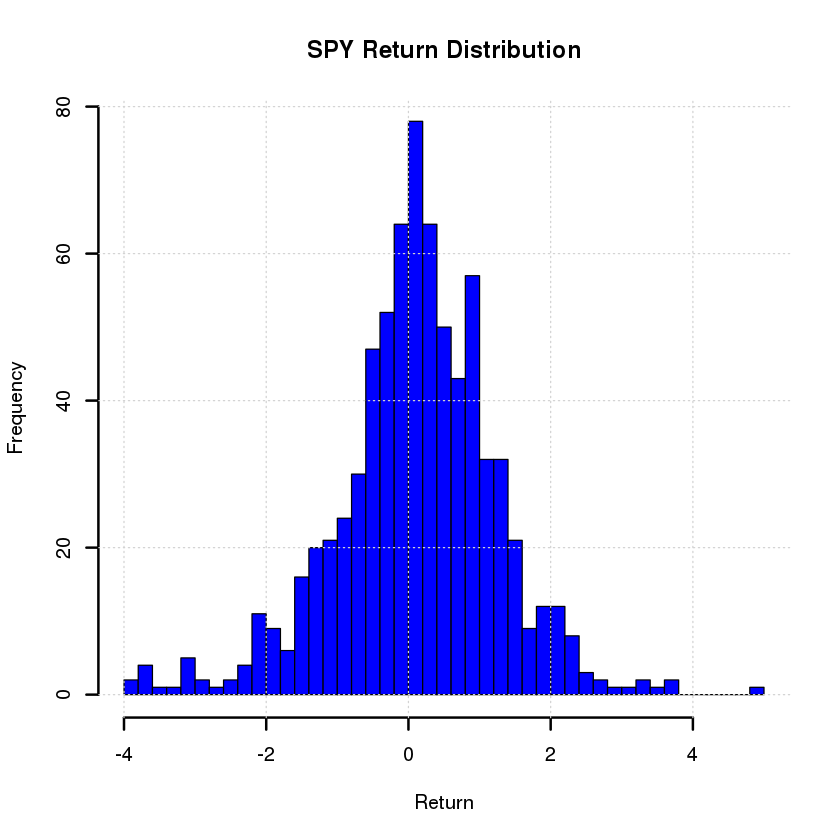

In [55]:
start = '2012-01-01'
end = '2015-01-01'
getSymbols('SPY', from=start, to=end)
head(SPY)
SPY.rtn = diff(SPY$SPY.Adjusted)
basicStats(SPY.rtn)
hist(SPY.rtn, nclass = 50,col = 'blue', lwd = 2, xlab = 'Return', main = 'SPY Return Distribution')
grid()

# Kurtosis

Kurtosis attempts to measure the shape of the deviation from the mean. Generally, it describes how peaked a distribution is compared the the normal distribution, called mesokurtic. All normal distributions, regardless of mean and variance, have a kurtosis of 3. A leptokurtic distribution (kurtosis > 3) is highly peaked and has fat tails, while a platykurtic distribution (kurtosis < 3) is broad. Sometimes, however, kurtosis in excess of the normal distribution (kurtosis - 3) is used, and this is the default in <b>R</b>. A leptokurtic distribution has more frequent large jumps away from the mean than a normal distribution does while a platykurtic distribution has fewer.

The formula for kurtosis is
$$ K = \left ( \frac{n(n+1)}{(n-1)(n-2)(n-3)} \frac{\sum_{i=1}^n (X_i - \mu)^4}{\sigma^4} \right ) $$

while excess kurtosis is given by
$$ K_E = \left ( \frac{n(n+1)}{(n-1)(n-2)(n-3)} \frac{\sum_{i=1}^n (X_i - \mu)^4}{\sigma^4} \right ) - \frac{3(n-1)^2}{(n-2)(n-3)} $$

For a large number of samples, the excess kurtosis becomes approximately

$$ K_E \approx \frac{1}{n} \frac{\sum_{i=1}^n (X_i - \mu)^4}{\sigma^4} - 3 $$

Since above we were considering perfect, continuous distributions, this was the form that kurtosis took. However, for a set of samples drawn for the normal distribution, we would use the first definition, and (excess) kurtosis would only be approximately 0.

From the above resulat we can see the excess kurtosis of the S&P 500 returns is 1.459567.